 # Plot Evaluation Curves
 ---

 The following code plots evaluation curves that shows the training process for each dataset size. Additionally, the final evaluation curves are shown for the fully trained models.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

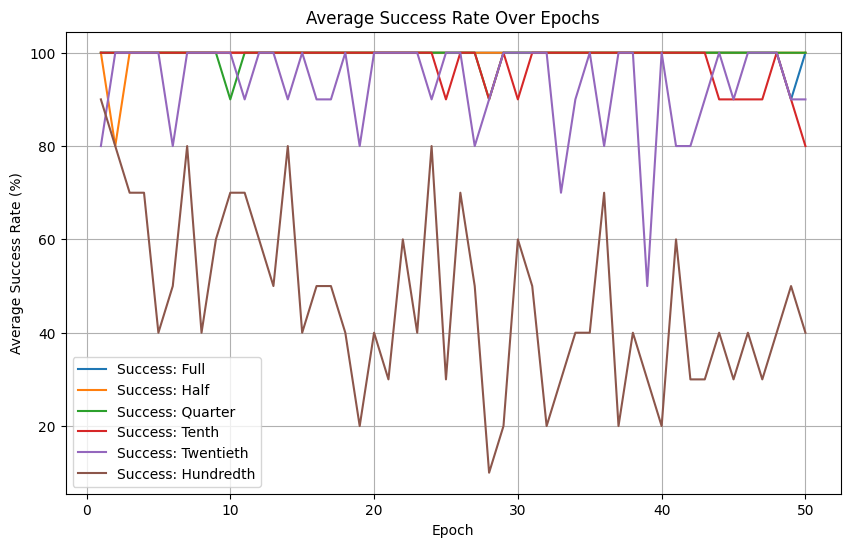

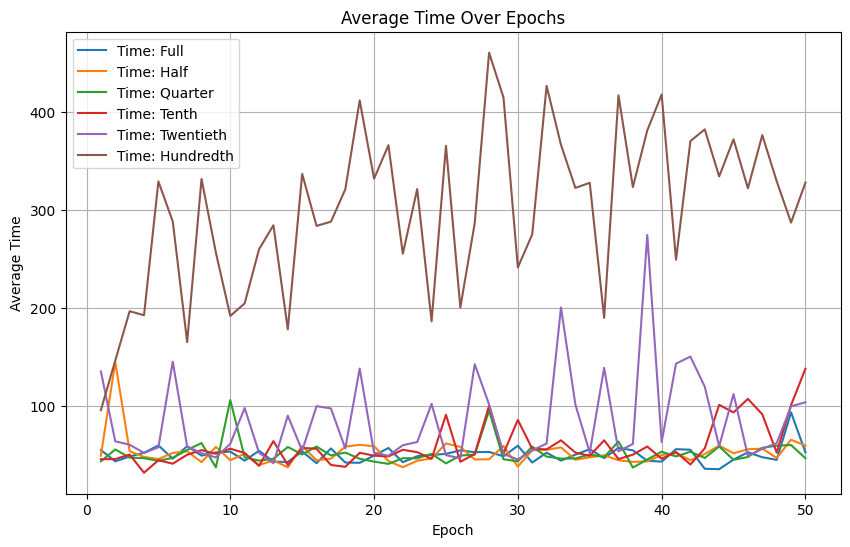

In [ ]:
csv_path = 'evaluation.csv'
evaluation = pd.read_csv(csv_path)

datasets = evaluation['Dataset'].unique()

dataset_dict = {dataset: evaluation[evaluation['Dataset'] == dataset] for dataset in datasets}

results = []

for dataset, data in dataset_dict.items():
    grouped = data.groupby('Epoch').agg(
        avg_time=('Time', 'mean'),
        avg_success=('Success', lambda x: x.mean() * 100)
    ).reset_index()

    grouped['Dataset'] = dataset
    results.append(grouped)

final_results = pd.concat(results)

datasets = final_results['Dataset'].unique()

plt.figure(figsize=(10, 6))
for dataset in datasets:
    subset = final_results[final_results['Dataset'] == dataset]
    plt.plot(subset['Epoch'], subset['avg_success'], label=f'Success: {dataset}')

plt.title('Success Rate Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Success Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for dataset in datasets:
    subset = final_results[final_results['Dataset'] == dataset]
    plt.plot(subset['Epoch'], subset['avg_time'], label=f'Time: {dataset}')

plt.title('Average Time per Episode Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Time per Episode')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-3-db17c017faf8>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = evaluation.groupby('Dataset').agg(


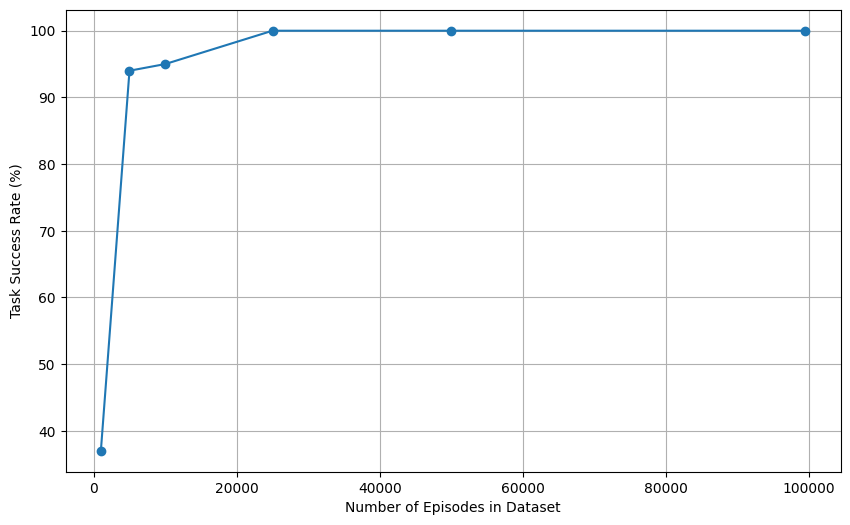


   Dataset  avg_time  avg_success
0    99522     53.30        100.0
1    50000     49.50        100.0
2    25000     51.49        100.0
3    10000     77.07         95.0
4     5000     82.39         94.0
5     1000    342.48         37.0


In [ ]:
csv_path = 'evaluation_final.csv'
evaluation = pd.read_csv(csv_path)

dataset_order = ['Full', 'Half', 'Quarter', 'Tenth', 'Twentieth', 'Hundredth']
dataset_percentages = [99522, 50000, 25000, 10000, 5000, 1000]
evaluation['Dataset'] = pd.Categorical(evaluation['Dataset'], categories=dataset_order, ordered=True)

grouped_data = evaluation.groupby('Dataset').agg(
    avg_time=('Time', 'mean'),
    avg_success=('Success', lambda x: x.mean() * 100)
).reset_index()

grouped_data['Dataset'] = dataset_percentages

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Dataset'], grouped_data['avg_success'], marker='o')
plt.xlabel('Number of Episodes in Dataset')
plt.ylabel('Task Success Rate (%)')
plt.grid(True)
plt.show()

print()
print(grouped_data)
